<a href="https://colab.research.google.com/github/khimanshu11/cipla-loan-saction/blob/main/cipla_loan_sanction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import LabelEncoder

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [99]:
train = pd.read_csv("./dataset/train.csv")
test = pd.read_csv("./dataset/test.csv")

In [3]:
train.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [4]:
train.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091407e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [6]:
print(len(np.unique(np.where(pd.isna(train))[0])))
print(len(np.unique(np.where(pd.isna(test))[0])))

14950
7815


In [7]:
train.Gender.unique()

array(['F', 'M', nan], dtype=object)

In [8]:
train.Profession.unique()

array(['Working', 'Pensioner', 'State servant', 'Commercial associate',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [9]:
train["Type of Employment"].unique()

array(['Sales staff', nan, 'High skill tech staff', 'Secretaries',
       'Laborers', 'Managers', 'Cooking staff', 'Core staff', 'Drivers',
       'Realty agents', 'Security staff', 'Accountants',
       'Private service staff', 'Waiters/barmen staff', 'Medicine staff',
       'Cleaning staff', 'Low-skill Laborers', 'HR staff', 'IT staff'],
      dtype=object)

In [10]:
train["Location"].unique()

array(['Semi-Urban', 'Rural', 'Urban'], dtype=object)

In [11]:
train = train.drop(['Customer ID', 'Property ID', 'Name'], axis=1)
# train = train[train["Loan Sanction Amount (USD)"].notna()] # Remove rows where loan sanctioned amount is na
# train = train[train["Property Age"] <= 36500] # Remove Properties older than 100 Years
train["Co-Applicant"] = train["Co-Applicant"].replace(-999, np.nan) # Replace Co-Applicant with nan

In [12]:
test = test.drop(['Customer ID', 'Property ID', 'Name'], axis=1)
test["Co-Applicant"] = test["Co-Applicant"].replace(-999, np.nan) # Replace Co-Applicant with nan

In [13]:
train_req = train

In [14]:
test["Co-Applicant"] = test["Co-Applicant"].replace(-999, np.nan)

In [15]:
display(train_req.shape)
display(test.shape)

(30000, 21)

(20000, 20)

### EDA

Check different type of Gender 



,Gender,#,%
0,M,15053,0.5
1,F,14894,0.5
2,NaN,53,0.0


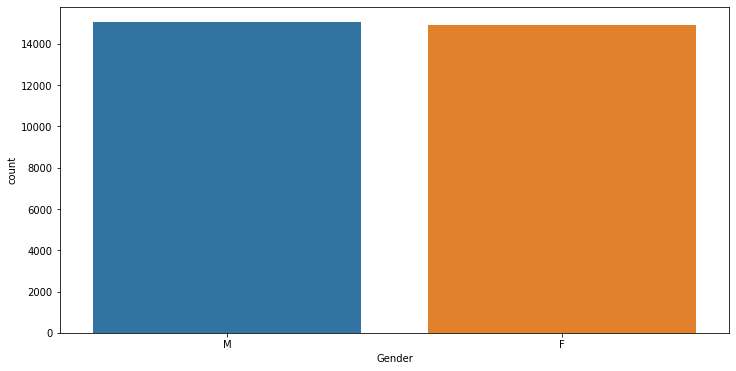

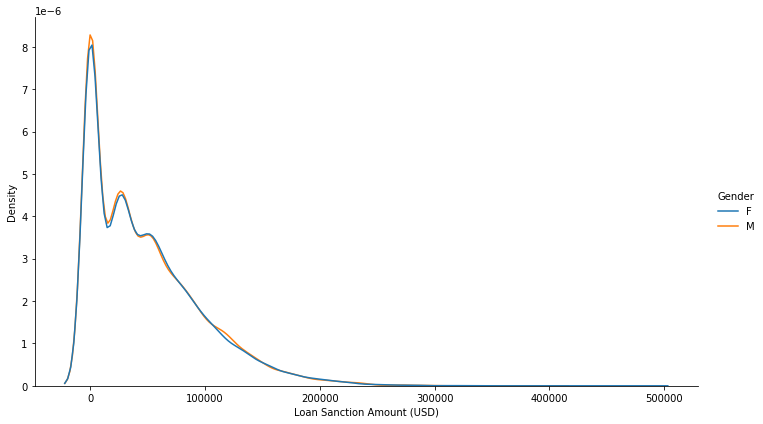

In [16]:
print("Check different type of Gender \n")
count_data = train_req.Gender.value_counts(normalize=True)
display(pd.DataFrame({'Gender': train_req.Gender.value_counts(dropna=False).index, 
                      '#':train_req.Gender.value_counts(dropna=False).values, 
                      '%': train_req.Gender.value_counts(normalize=True, dropna=False).values.round(2)}))
fig = plt.figure(figsize=(12,6))
sns.countplot(x="Gender", data=train_req, order=count_data.index)

sns.displot(train_req, x="Loan Sanction Amount (USD)", hue="Gender", kind = "kde", height=6, aspect=10/6)

Looks like there is no gender bias while sanctioning the loan

Check different type of Age 



,Age,#,%
0,18,4378,0.15
1,65,1349,0.04
2,64,813,0.03
3,61,787,0.03
4,62,784,0.03
5,60,774,0.03
6,63,712,0.02
7,57,538,0.02
8,47,536,0.02
9,44,523,0.02


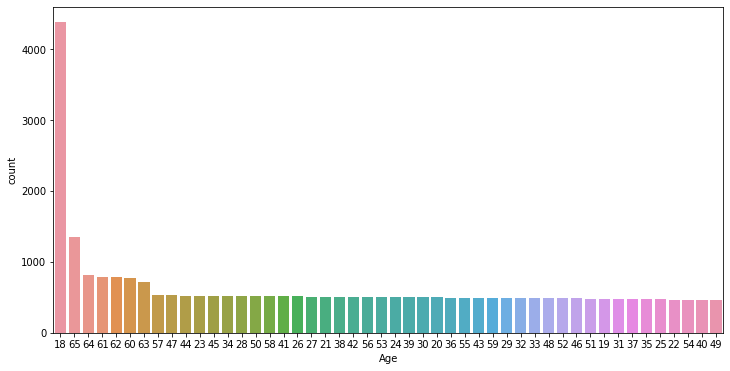

In [17]:
print("Check different type of Age \n")
count_data = train_req.Age.value_counts(normalize=True)
display(pd.DataFrame({'Age': train_req.Age.value_counts(dropna=False).index, 
                      '#':train_req.Age.value_counts(dropna=False).values, 
                      '%': train_req.Age.value_counts(normalize=True, dropna=False).values.round(2)}))
fig = plt.figure(figsize=(12,6))
sns.countplot(x="Age", data=train_req, order=count_data.index)

# sns.displot(train_req, x="Loan Sanction Amount (USD)", hue="Age", kind = "kde", height=6, aspect=10/6)

We can observe here people with 18 years of age given highest number of loan as bank expectation they will be able to pay the loan for longer period of time and bank will make more profit

Check different type of Income Stability 



,Income Stability,#,%
0,Low,25751,0.86
1,High,2566,0.09
2,NaN,1683,0.06


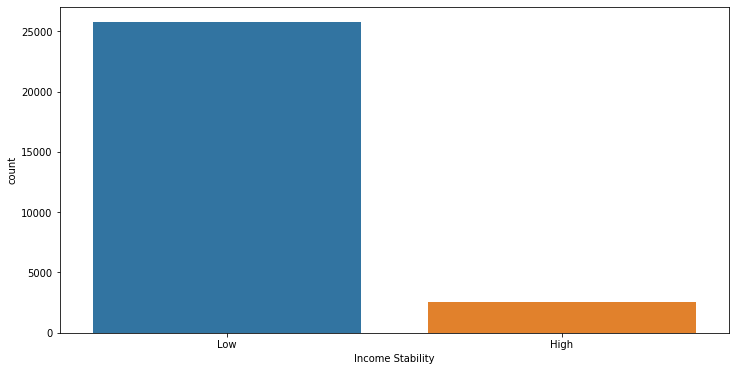

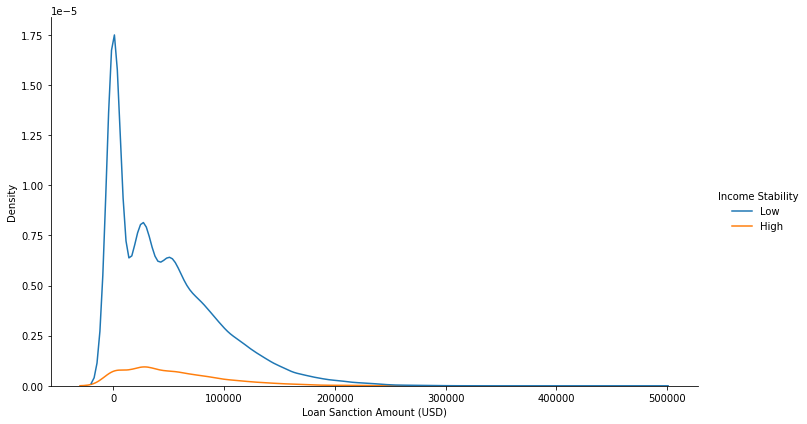

In [18]:
print("Check different type of Income Stability \n")
count_data = train_req["Income Stability"].value_counts(normalize=True)
display(pd.DataFrame({'Income Stability': train_req["Income Stability"].value_counts(dropna=False).index, 
                      '#':train_req["Income Stability"].value_counts(dropna=False).values, 
                      '%': train_req["Income Stability"].value_counts(normalize=True, dropna=False).values.round(2)}))
fig = plt.figure(figsize=(12,6))
sns.countplot(x="Income Stability", data=train_req, order=count_data.index)

sns.displot(train_req, x="Loan Sanction Amount (USD)", hue="Income Stability", kind = "kde", height=6, aspect=10/6)

Only 9% of pepole has stable income compare to 91% of people

Check different type of Profession 



,Profession,#,%
0,Working,16926,0.56
1,Commercial associate,7962,0.27
2,Pensioner,2740,0.09
3,State servant,2366,0.08
4,Unemployed,2,0.00
5,Businessman,2,0.00
6,Student,1,0.00
7,Maternity leave,1,0.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


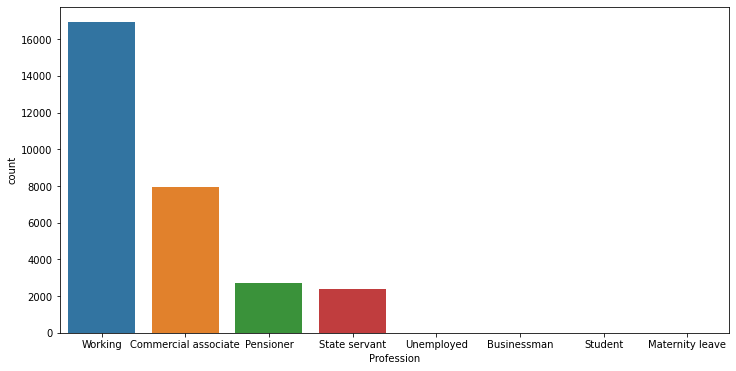

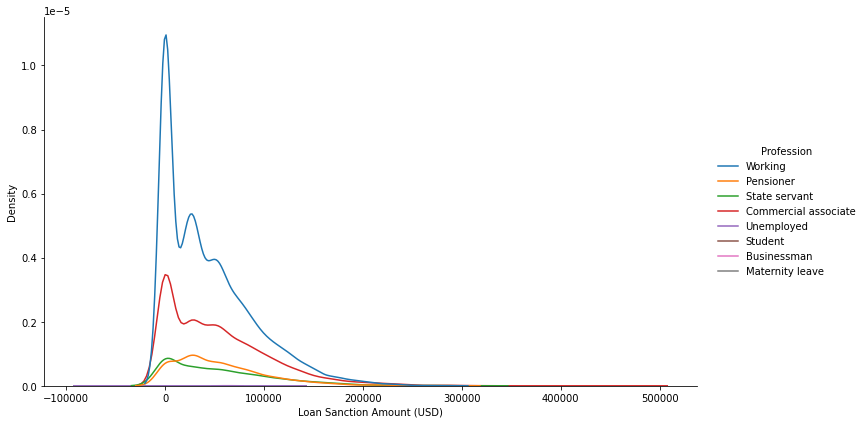

In [19]:
print("Check different type of Profession \n")
count_data = train_req["Profession"].value_counts(normalize=True)
display(pd.DataFrame({'Profession': train_req["Profession"].value_counts(dropna=False).index, 
                      '#':train_req["Profession"].value_counts(dropna=False).values, 
                      '%': train_req["Profession"].value_counts(normalize=True, dropna=False).values.round(2)}))
fig = plt.figure(figsize=(12,6))
sns.countplot(x="Profession", data=train_req, order=count_data.index)

sns.displot(train_req, x="Loan Sanction Amount (USD)", hue="Profession", kind = "kde", height=6, aspect=10/6)

Most of the people are doing some type of job and only one person is on maternity leave andn only 1 Stuent

Check different type of Type of Employment 



,Type of Employment,#,%
0,NaN,7270,0.2423
1,Laborers,5578,0.1859
2,Sales staff,3736,0.1245
3,Core staff,3230,0.1077
4,Managers,2495,0.0832
5,Drivers,1606,0.0535
6,Accountants,1379,0.0460
7,High skill tech staff,1307,0.0436
8,Medicine staff,864,0.0288
9,Security staff,579,0.0193


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

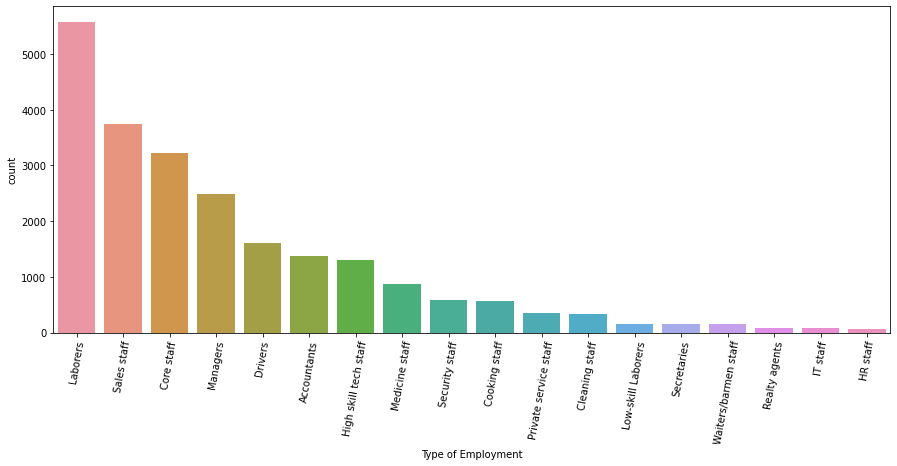

In [20]:
print("Check different type of Type of Employment \n")
count_data = train_req["Type of Employment"].value_counts(normalize=True)
display(pd.DataFrame({'Type of Employment': train_req["Type of Employment"].value_counts(dropna = False).index, 
                      '#':train_req["Type of Employment"].value_counts(dropna = False).values, 
                      '%': train_req["Type of Employment"].value_counts(normalize=True, dropna = False).values.round(4)}))
fig = plt.figure(figsize=(15,6))
sns.countplot(x="Type of Employment", data=train_req, order=count_data.index)
plt.xticks(rotation=80)

# sns.displot(train_req, x="Loan Sanction Amount (USD)", hue="Type of Employment", kind = "kde", height=6, aspect=10/6)

Mostly people are Laborer, Sales staff, core staff, managers and drivers

Check different type of Location 



,Location,#,%
0,Semi-Urban,21563,0.7188
1,Rural,5338,0.1779
2,Urban,3099,0.1033


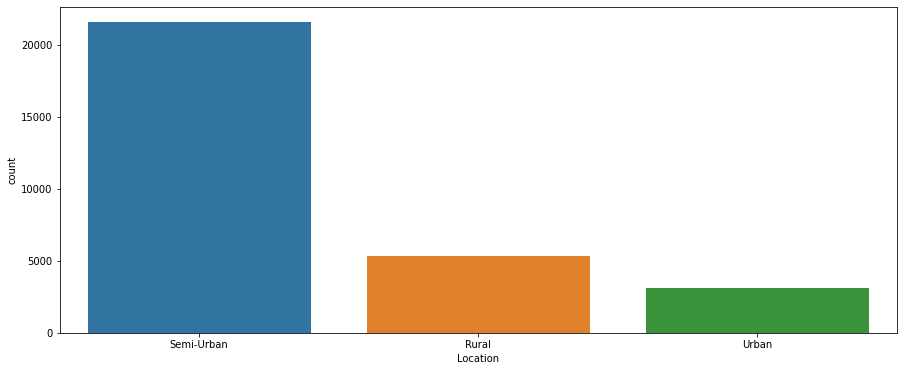

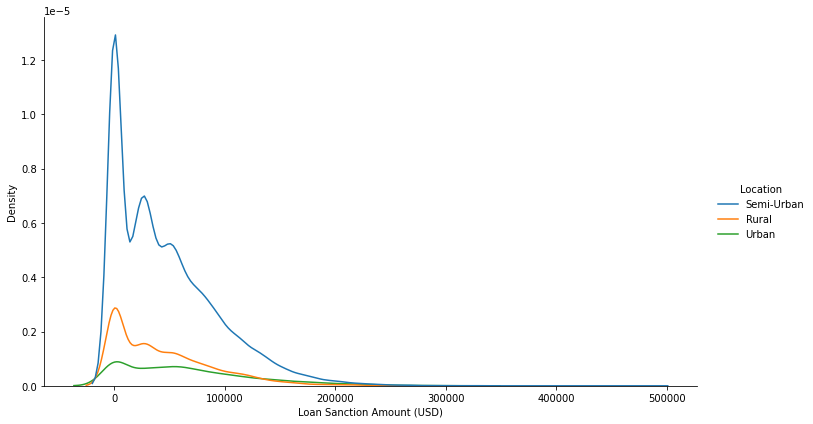

In [21]:
print("Check different type of Location \n")
count_data = train_req["Location"].value_counts(normalize=True)
display(pd.DataFrame({'Location': train_req["Location"].value_counts(dropna = False).index, 
                      '#':train_req["Location"].value_counts(dropna = False).values, 
                      '%': train_req["Location"].value_counts(normalize=True, dropna = False).values.round(4)}))
fig = plt.figure(figsize=(15,6))
sns.countplot(x="Location", data=train_req, order=count_data.index)

sns.displot(train_req, x="Loan Sanction Amount (USD)", hue="Location", kind = "kde", height=6, aspect=10/6)

Most of the people applying for loan is Semi-Urban and only 10% people from Urban area are applying for loan

Check different type of Expense Type 1 



,Expense Type 1,#,%
0,N,19214,0.6405
1,Y,10786,0.3595


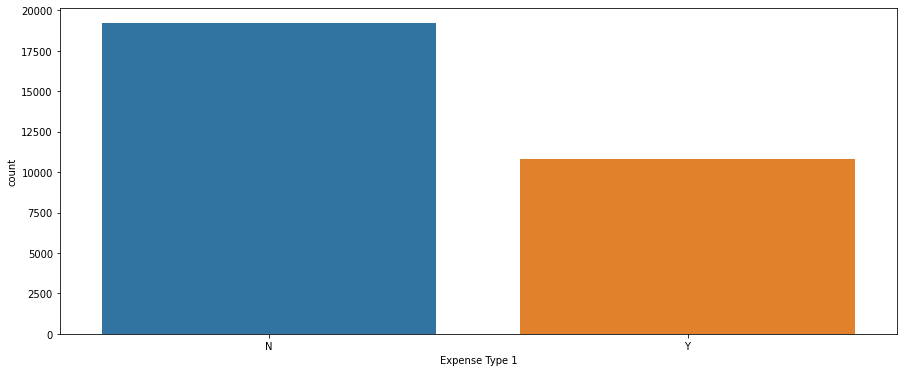

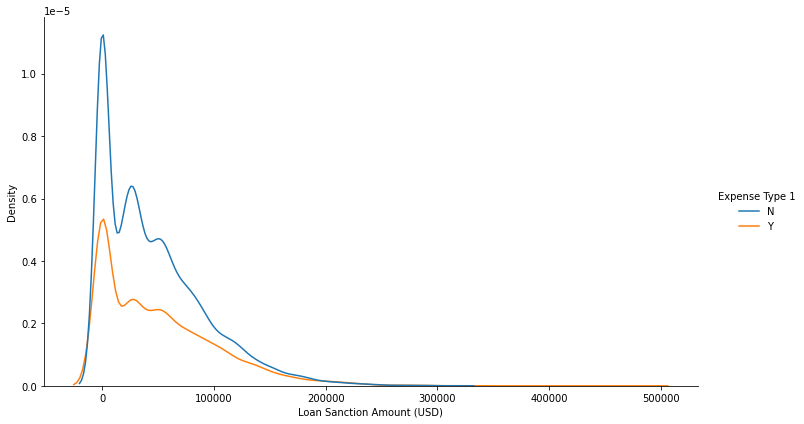

In [22]:
print("Check different type of Expense Type 1 \n")
count_data = train_req["Expense Type 1"].value_counts(normalize=True)
display(pd.DataFrame({'Expense Type 1': train_req["Expense Type 1"].value_counts(dropna = False).index, 
                      '#':train_req["Expense Type 1"].value_counts(dropna = False).values, 
                      '%': train_req["Expense Type 1"].value_counts(normalize=True, dropna = False).values.round(4)}))
fig = plt.figure(figsize=(15,6))
sns.countplot(x="Expense Type 1", data=train_req, order=count_data.index)

sns.displot(train_req, x="Loan Sanction Amount (USD)", hue="Expense Type 1", kind = "kde", height=6, aspect=10/6)

Check different type of Expense Type 2 



,Expense Type 2,#,%
0,Y,20180,0.6727
1,N,9820,0.3273


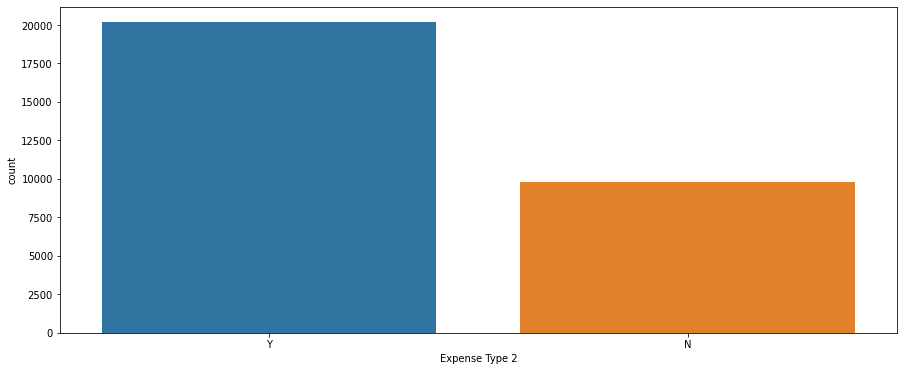

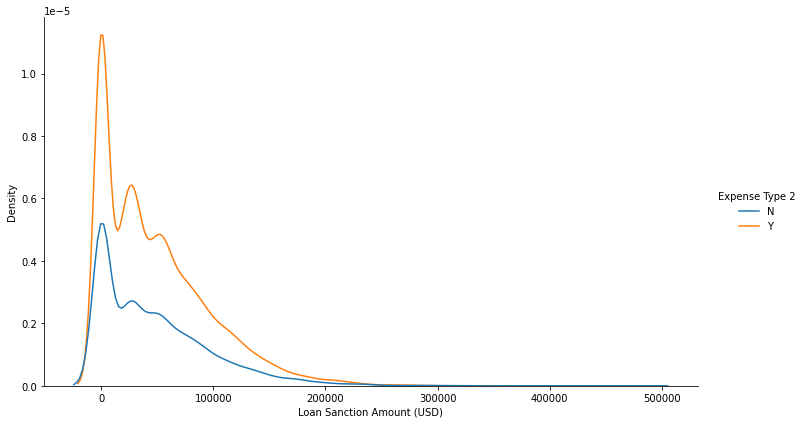

In [23]:
print("Check different type of Expense Type 2 \n")
count_data = train_req["Expense Type 2"].value_counts(normalize=True)
display(pd.DataFrame({'Expense Type 2': train_req["Expense Type 2"].value_counts(dropna = False).index, 
                      '#':train_req["Expense Type 2"].value_counts(dropna = False).values, 
                      '%': train_req["Expense Type 2"].value_counts(normalize=True, dropna = False).values.round(4)}))
fig = plt.figure(figsize=(15,6))
sns.countplot(x="Expense Type 2", data=train_req, order=count_data.index)

sns.displot(train_req, x="Loan Sanction Amount (USD)", hue="Expense Type 2", kind = "kde", height=6, aspect=10/6)

Check different type of Dependents 



,Dependents,#,%
0,2.0,13108,0.4369
1,3.0,5719,0.1906
2,1.0,5544,0.1848
3,4.0,2704,0.0901
4,NaN,2493,0.0831
5,5.0,372,0.0124
6,6.0,50,0.0017
7,7.0,7,0.0002
8,14.0,1,0.0000
9,10.0,1,0.0000


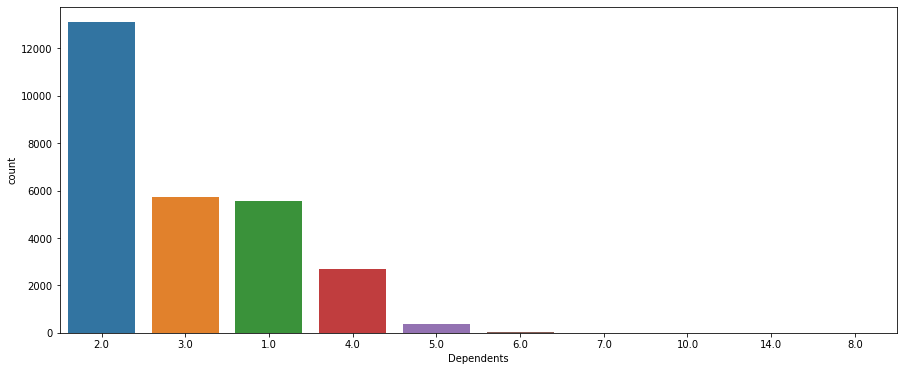

In [24]:
print("Check different type of Dependents \n")
count_data = train_req["Dependents"].value_counts(normalize=True)
display(pd.DataFrame({'Dependents': train_req["Dependents"].value_counts(dropna = False).index, 
                      '#':train_req["Dependents"].value_counts(dropna = False).values, 
                      '%': train_req["Dependents"].value_counts(normalize=True, dropna = False).values.round(4)}))
fig = plt.figure(figsize=(15,6))
sns.countplot(x="Dependents", data=train_req, order=count_data.index)

# sns.displot(train_req, x="Loan Sanction Amount (USD)", hue="Dependents", kind = "kde", height=6, aspect=10/6)

Most of the people has 2 or 3 dependent around 62% of total sample

Check different type of No. of Defaults 



,No. of Defaults,#,%
0,0,24182,0.8061
1,1,5818,0.1939


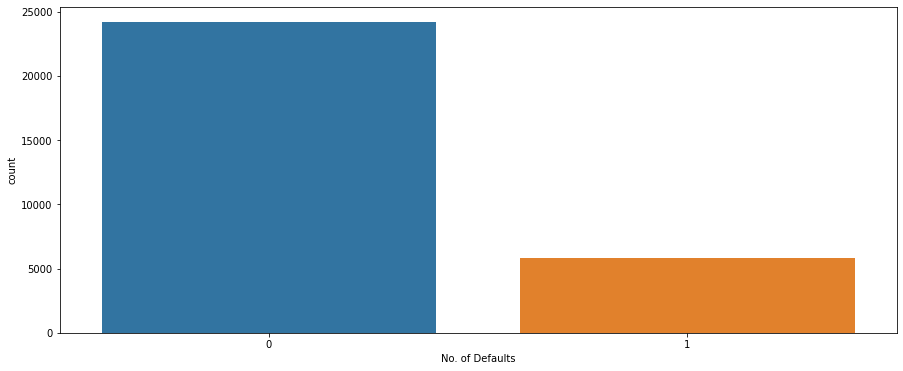

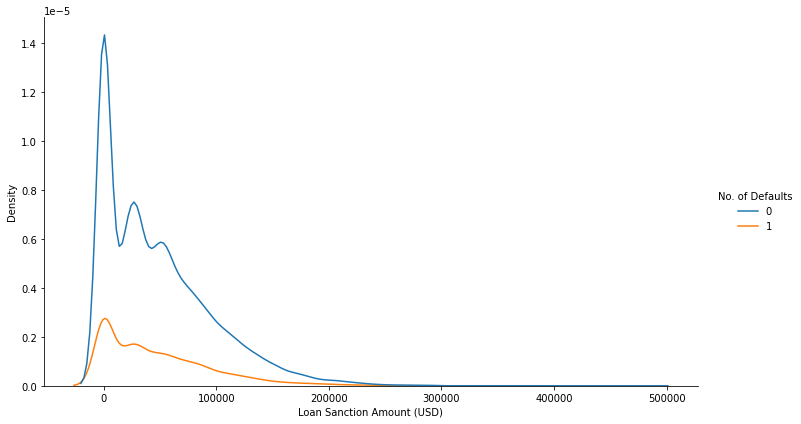

In [25]:
print("Check different type of No. of Defaults \n")
count_data = train_req["No. of Defaults"].value_counts(normalize=True)
display(pd.DataFrame({'No. of Defaults': train_req["No. of Defaults"].value_counts(dropna = False).index, 
                      '#':train_req["No. of Defaults"].value_counts(dropna = False).values, 
                      '%': train_req["No. of Defaults"].value_counts(normalize=True, dropna = False).values.round(4)}))
fig = plt.figure(figsize=(15,6))
sns.countplot(x="No. of Defaults", data=train_req, order=count_data.index)

sns.displot(train_req, x="Loan Sanction Amount (USD)", hue="No. of Defaults", kind = "kde", height=6, aspect=10/6)

80% people are not defaulters

Check different type of Has Active Credit Card 



,Has Active Credit Card,#,%
0,Active,9771,0.3257
1,Inactive,9466,0.3155
2,Unpossessed,9197,0.3066
3,NaN,1566,0.0522


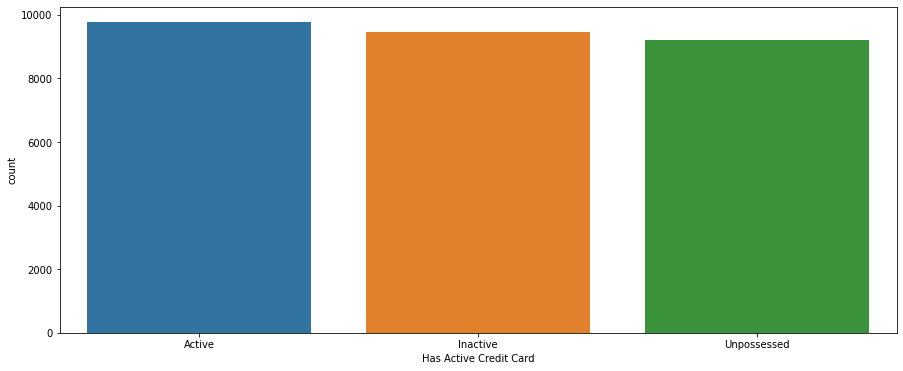

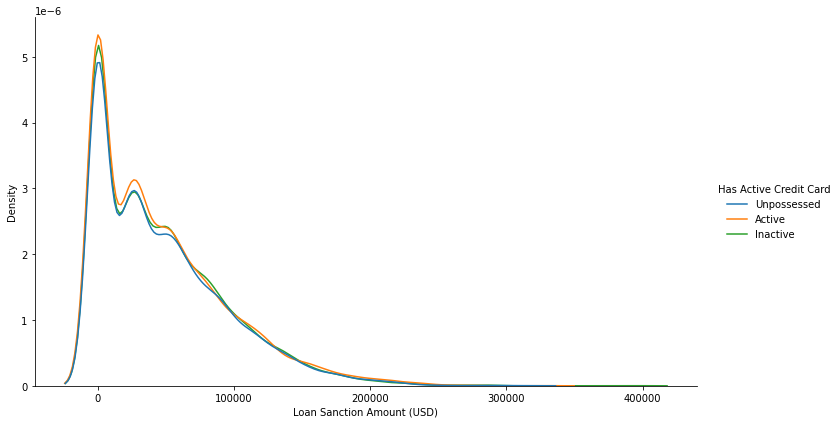

In [26]:
print("Check different type of Has Active Credit Card \n")
count_data = train_req["Has Active Credit Card"].value_counts(normalize=True)
display(pd.DataFrame({'Has Active Credit Card': train_req["Has Active Credit Card"].value_counts(dropna = False).index, 
                      '#':train_req["Has Active Credit Card"].value_counts(dropna = False).values, 
                      '%': train_req["Has Active Credit Card"].value_counts(normalize=True, dropna = False).values.round(4)}))
fig = plt.figure(figsize=(15,6))
sns.countplot(x="Has Active Credit Card", data=train_req, order=count_data.index)

sns.displot(train_req, x="Loan Sanction Amount (USD)", hue="Has Active Credit Card", kind = "kde", height=6, aspect=10/6)

all category has almost equal number of people

Check different type of Property Type 



,Property Type,#,%
0,1,7863,0.2621
1,2,7650,0.2550
2,3,7309,0.2436
3,4,7178,0.2393


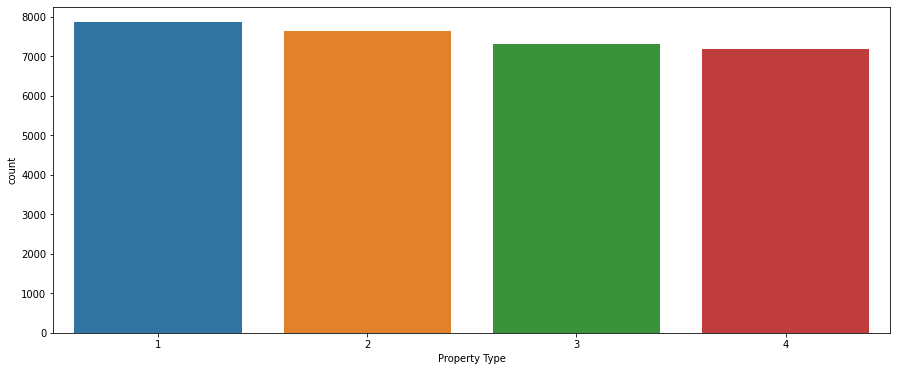

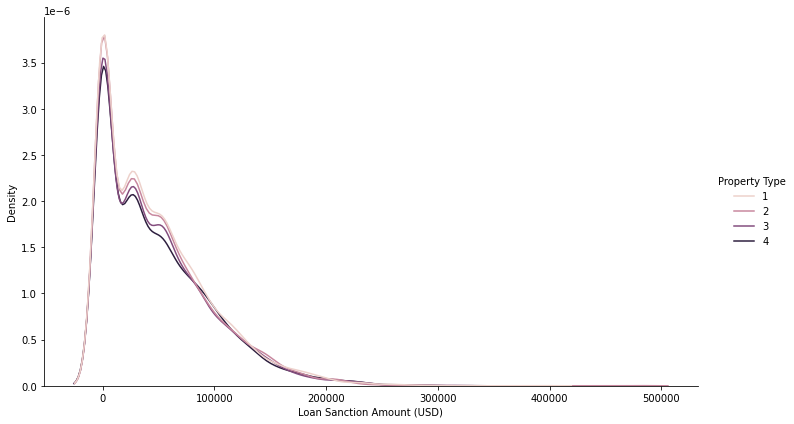

In [27]:
print("Check different type of Property Type \n")
count_data = train_req["Property Type"].value_counts(normalize=True)
display(pd.DataFrame({'Property Type': train_req["Property Type"].value_counts(dropna = False).index, 
                      '#':train_req["Property Type"].value_counts(dropna = False).values, 
                      '%': train_req["Property Type"].value_counts(normalize=True, dropna = False).values.round(4)}))
fig = plt.figure(figsize=(15,6))
sns.countplot(x="Property Type", data=train_req, order=count_data.index)

sns.displot(train_req, x="Loan Sanction Amount (USD)", hue="Property Type", kind = "kde", height=6, aspect=10/6)

Check different type of Property Location 



,Property Location,#,%
0,Semi-Urban,10387,0.3462
1,Rural,10041,0.3347
2,Urban,9216,0.3072
3,NaN,356,0.0119


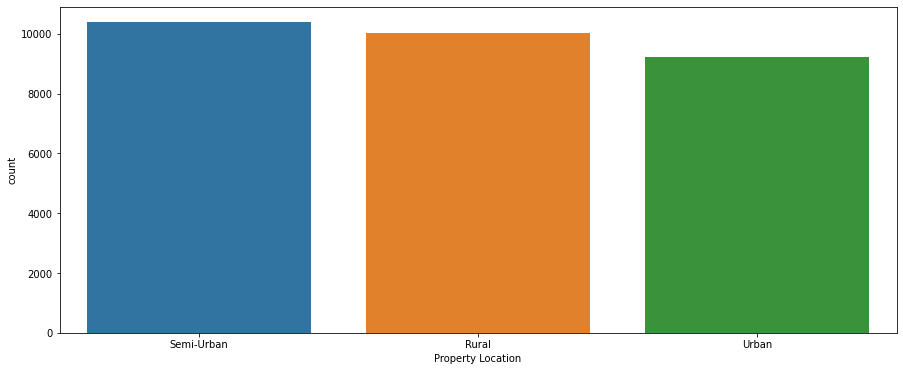

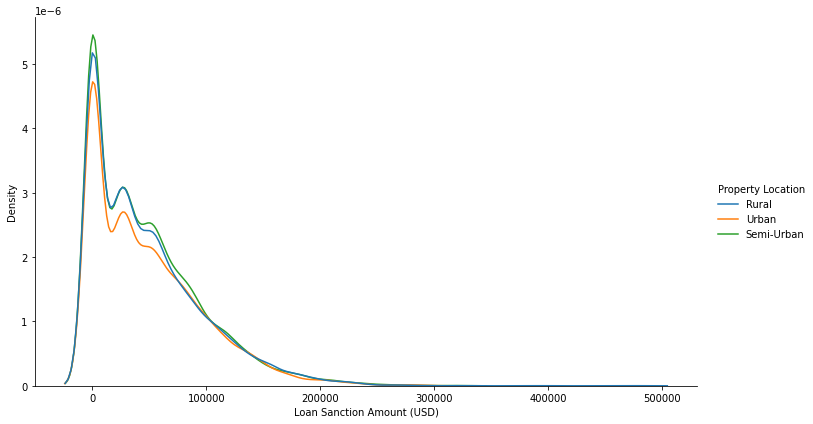

In [28]:
print("Check different type of Property Location \n")
count_data = train_req["Property Location"].value_counts(normalize=True)
display(pd.DataFrame({'Property Location': train_req["Property Location"].value_counts(dropna = False).index, 
                      '#':train_req["Property Location"].value_counts(dropna = False).values, 
                      '%': train_req["Property Location"].value_counts(normalize=True, dropna = False).values.round(4)}))
fig = plt.figure(figsize=(15,6))
sns.countplot(x="Property Location", data=train_req, order=count_data.index)

sns.displot(train_req, x="Loan Sanction Amount (USD)", hue="Property Location", kind = "kde", height=6, aspect=10/6)

Most of the property are locate in semi urban area

Check different type of Co-Applicant 



,Co-Applicant,#,%
0,1.0,25516,0.8505
1,0.0,4316,0.1439
2,NaN,168,0.0056


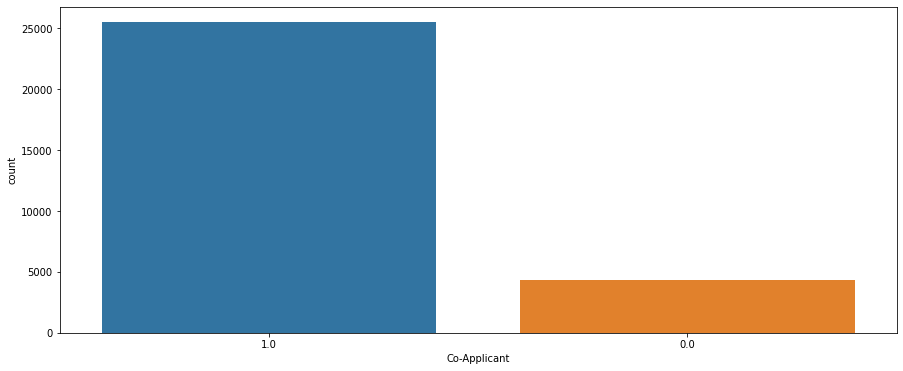

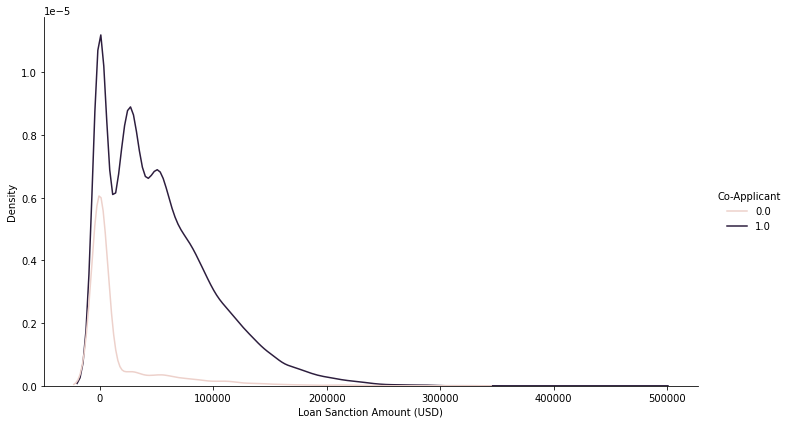

In [29]:
print("Check different type of Co-Applicant \n")
count_data = train_req["Co-Applicant"].value_counts(normalize=True)
display(pd.DataFrame({'Co-Applicant': train_req["Co-Applicant"].value_counts(dropna = False).index, 
                      '#':train_req["Co-Applicant"].value_counts(dropna = False).values, 
                      '%': train_req["Co-Applicant"].value_counts(normalize=True, dropna = False).values.round(4)}))
fig = plt.figure(figsize=(15,6))
sns.countplot(x="Co-Applicant", data=train_req, order=count_data.index)

sns.displot(train_req, x="Loan Sanction Amount (USD)", hue="Co-Applicant", kind = "kde", height=6, aspect=10/6)

85% people has co-applicants

Property Price and Property Age


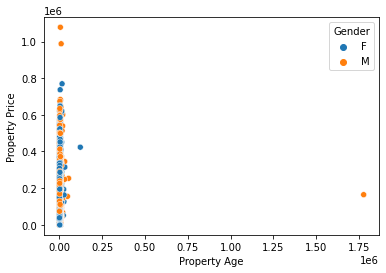

In [30]:
print("Property Price and Property Age")

sns.scatterplot(data=train_req, x="Property Age", y="Property Price", hue="Gender")

Loan Sanction Amount (USD) and Property Age


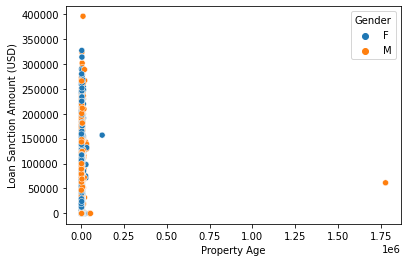

In [31]:
print("Loan Sanction Amount (USD) and Property Age")

sns.scatterplot(data=train_req, x="Property Age", y="Loan Sanction Amount (USD)", hue="Gender")

Create data model
First remove all the data which have na and create model

In [32]:
x =train_req.isna()
x.shape

(30000, 21)

In [33]:
train_req.shape

(30000, 21)

In [34]:
train_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       29947 non-null  object 
 1   Age                          30000 non-null  int64  
 2   Income (USD)                 25424 non-null  float64
 3   Income Stability             28317 non-null  object 
 4   Profession                   30000 non-null  object 
 5   Type of Employment           22730 non-null  object 
 6   Location                     30000 non-null  object 
 7   Loan Amount Request (USD)    30000 non-null  float64
 8   Current Loan Expenses (USD)  29828 non-null  float64
 9   Expense Type 1               30000 non-null  object 
 10  Expense Type 2               30000 non-null  object 
 11  Dependents                   27507 non-null  float64
 12  Credit Score                 28297 non-null  float64
 13  No. of Defaults 

In [35]:
train_without_na = train_req.dropna()

In [36]:
train_without_na.shape

(14989, 21)

In [37]:
train_removed_na_with_dummy_coding = pd.get_dummies(train_without_na, drop_first=True)

In [38]:
train_removed_na_with_dummy_coding.shape

(14989, 40)

In [39]:
train_removed_na_with_dummy_coding.head()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD),Gender_M,Profession_State servant,Profession_Working,Type of Employment_Cleaning staff,Type of Employment_Cooking staff,Type of Employment_Core staff,Type of Employment_Drivers,Type of Employment_HR staff,Type of Employment_High skill tech staff,Type of Employment_IT staff,Type of Employment_Laborers,Type of Employment_Low-skill Laborers,Type of Employment_Managers,Type of Employment_Medicine staff,Type of Employment_Private service staff,Type of Employment_Realty agents,Type of Employment_Sales staff,Type of Employment_Secretaries,Type of Employment_Security staff,Type of Employment_Waiters/barmen staff,Location_Semi-Urban,Location_Urban,Expense Type 1_Y,Expense Type 2_Y,Has Active Credit Card_Inactive,Has Active Credit Card_Unpossessed,Property Location_Semi-Urban,Property Location_Urban
5,60,1234.92,34434.72,181.48,2.0,684.12,1,1234.92,2,1.0,43146.82,22382.57,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
6,43,2361.56,152561.34,697.67,2.0,637.29,0,2361.56,1,1.0,221050.80,0.00,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0
8,38,1296.07,35141.99,155.95,3.0,705.29,1,1296.07,4,1.0,54903.44,22842.29,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,18,1546.17,42091.29,500.20,2.0,613.24,0,1546.17,2,1.0,67993.43,0.00,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
10,18,2416.86,25765.72,140.02,1.0,652.41,0,2416.86,2,1.0,32423.71,16747.72,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [40]:
train_removed_na_with_dummy_coding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14989 entries, 5 to 29998
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       14989 non-null  int64  
 1   Income (USD)                              14989 non-null  float64
 2   Loan Amount Request (USD)                 14989 non-null  float64
 3   Current Loan Expenses (USD)               14989 non-null  float64
 4   Dependents                                14989 non-null  float64
 5   Credit Score                              14989 non-null  float64
 6   No. of Defaults                           14989 non-null  int64  
 7   Property Age                              14989 non-null  float64
 8   Property Type                             14989 non-null  int64  
 9   Co-Applicant                              14989 non-null  float64
 10  Property Price                    

In [41]:
train_removed_na_with_dummy_coding["Dependents"] = train_removed_na_with_dummy_coding["Dependents"].astype(int)
train_removed_na_with_dummy_coding["Co-Applicant"] = train_removed_na_with_dummy_coding["Co-Applicant"].astype(int) 

In [42]:
train_removed_na_with_dummy_coding.head()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD),Gender_M,Profession_State servant,Profession_Working,Type of Employment_Cleaning staff,Type of Employment_Cooking staff,Type of Employment_Core staff,Type of Employment_Drivers,Type of Employment_HR staff,Type of Employment_High skill tech staff,Type of Employment_IT staff,Type of Employment_Laborers,Type of Employment_Low-skill Laborers,Type of Employment_Managers,Type of Employment_Medicine staff,Type of Employment_Private service staff,Type of Employment_Realty agents,Type of Employment_Sales staff,Type of Employment_Secretaries,Type of Employment_Security staff,Type of Employment_Waiters/barmen staff,Location_Semi-Urban,Location_Urban,Expense Type 1_Y,Expense Type 2_Y,Has Active Credit Card_Inactive,Has Active Credit Card_Unpossessed,Property Location_Semi-Urban,Property Location_Urban
5,60,1234.92,34434.72,181.48,2,684.12,1,1234.92,2,1,43146.82,22382.57,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
6,43,2361.56,152561.34,697.67,2,637.29,0,2361.56,1,1,221050.80,0.00,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0
8,38,1296.07,35141.99,155.95,3,705.29,1,1296.07,4,1,54903.44,22842.29,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,18,1546.17,42091.29,500.20,2,613.24,0,1546.17,2,1,67993.43,0.00,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
10,18,2416.86,25765.72,140.02,1,652.41,0,2416.86,2,1,32423.71,16747.72,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


### Working first model

In [43]:
y = train_removed_na_with_dummy_coding["Loan Sanction Amount (USD)"]
X = train_removed_na_with_dummy_coding.drop(["Loan Sanction Amount (USD)"], axis=1)

In [44]:
X.shape

(14989, 39)

In [45]:
y.shape

(14989,)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=43)

In [47]:
reg_model = sm.OLS(y_train, X_train).fit()

In [48]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     Loan Sanction Amount (USD)   R-squared (uncentered):                   0.757
Model:                                    OLS   Adj. R-squared (uncentered):              0.756
Method:                         Least Squares   F-statistic:                              818.0
Date:                        Mon, 28 Jun 2021   Prob (F-statistic):                        0.00
Time:                                10:38:05   Log-Likelihood:                     -1.1820e+05
No. Observations:                       10042   AIC:                                  2.365e+05
Df Residuals:                           10004   BIC:                                  2.368e+05
Df Model:                                  38                                                  
Covariance Type:                    nonrobust                                                  
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Age                                       -168.3136     20.499     -8.211      0.000    -208.495    -128.132
Income (USD)                                 0.0063      0.009      0.718      0.472      -0.011       0.024
Loan Amount Request (USD)                    0.5530      0.018     30.360      0.000       0.517       0.589
Current Loan Expenses (USD)                 -7.7241      1.859     -4.154      0.000     -11.369      -4.079
Dependents                               -2532.8889    317.776     -7.971      0.000   -3155.794   -1909.984
Credit Score                                15.4973      2.716      5.706      0.000      10.173      20.821
No. of Defaults                          -2241.8507    798.714     -2.807      0.005   -3807.491    -676.210
Property Age                                 0.0063      0.009      0.718      0.473      -0.011       0.024
Property Type                            -2020.8387    277.859     -7.273      0.000   -2565.497   -1476.180
Co-Applicant                              3.857e+04    880.906     43.784      0.000    3.68e+04    4.03e+04
Property Price                              -0.0173      0.011     -1.555      0.120      -0.039       0.005
Gender_M                                 -1816.4747    625.552     -2.904      0.004   -3042.682    -590.267
Profession_State servant                 -4698.6786   1282.015     -3.665      0.000   -7211.685   -2185.672
Profession_Working                       -3816.3942    732.429     -5.211      0.000   -5252.102   -2380.687
Type of Employment_Cleaning staff        -1.558e+04   2767.000     -5.631      0.000    -2.1e+04   -1.02e+04
Type of Employment_Cooking staff         -1.788e+04   2290.514     -7.806      0.000   -2.24e+04   -1.34e+04
Type of Employment_Core staff            -1.454e+04   1476.793     -9.846      0.000   -1.74e+04   -1.16e+04
Type of Employment_Drivers               -2.123e+04   1660.816    -12.784      0.000   -2.45e+04    -1.8e+04
Type of Employment_HR staff              -1.525e+04   6161.837     -2.475      0.013   -2.73e+04   -3170.846
Type of Employment_High skill tech staff -1.604e+04   1749.684     -9.168      0.000   -1.95e+04   -1.26e+04
Type of Employment_IT staff              -1.607e+04   6655.784     -2.415      0.016   -2.91e+04   -3027.156
Type of Employment_Laborers              -2.115e+04   1322.745    -15.988      0.000   -2.37e+04   -1.86e+04
Type of Employment_Low-skill Laborers      -2.1e+04   4185.496     -5.017      0.000   -2.92e+04   -1.28e+04
Type of Employment_Managers              -1.354e+04   1542.123

In [49]:
skl_regression = LinearRegression()
skl_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
skl_reg_pred = skl_regression.predict(X_test)
# The coefficients
# print('Coefficients: \n', skl_regression.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, skl_reg_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, skl_reg_pred))

Mean squared error: 900704519.99
Coefficient of determination: 0.60


In [51]:
scores = cross_val_score(skl_regression, X_train, y_train, scoring='r2', cv=5)
scores

array([0.57072574, 0.37239489, 0.61634237, 0.61369779, 0.61544883])

In [52]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(skl_regression, X_train, y_train, scoring='r2', cv=folds)
scores  

array([0.63144543, 0.62055642, 0.33572421, 0.59624296, 0.58718707])

In [53]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 39))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 190 out of 190 | elapsed:   43.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [54]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
# cv_results

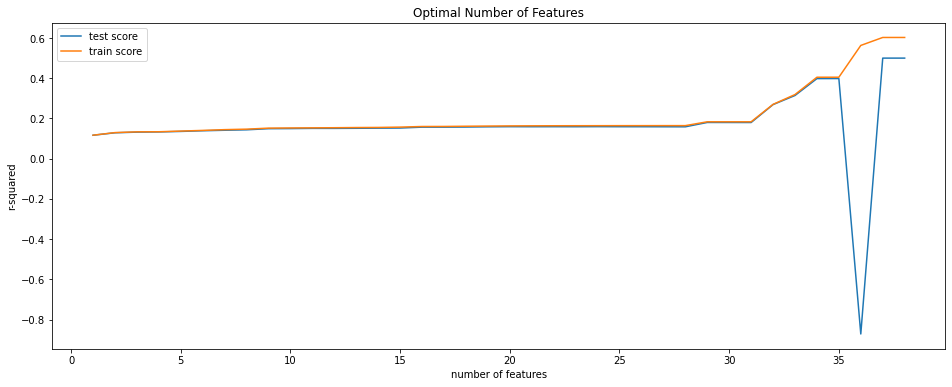

In [55]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [56]:
model_cv.best_score_

0.5001329117843815

In [57]:
model_cv.best_params_

{'n_features_to_select': 38}

In [58]:
model_cv.best_estimator_

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=38, step=1, verbose=0)

In [59]:
# final model
n_features_optimal = 36

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.5989317203657045


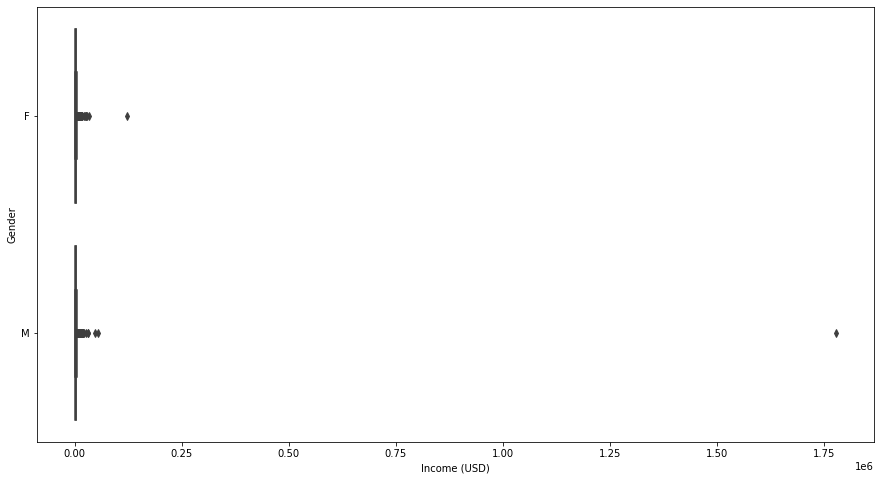

In [60]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(x="Income (USD)",y = "Gender", data=train_req)

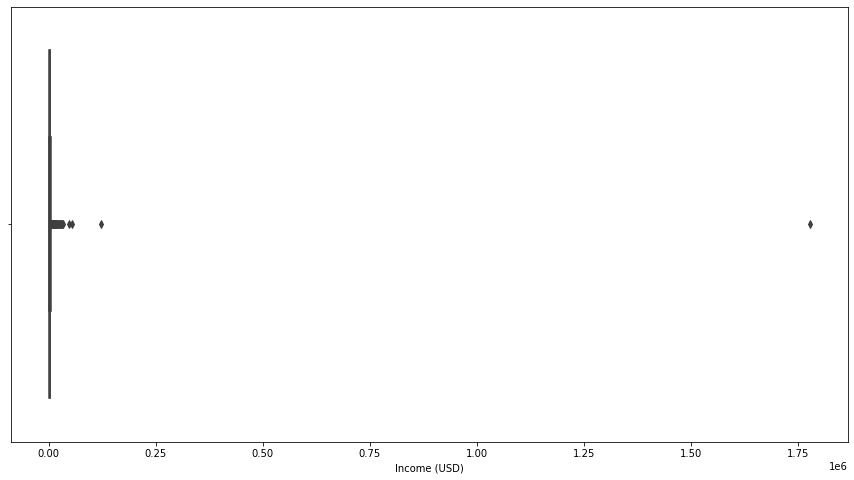

In [61]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(x="Income (USD)", data=train_req)

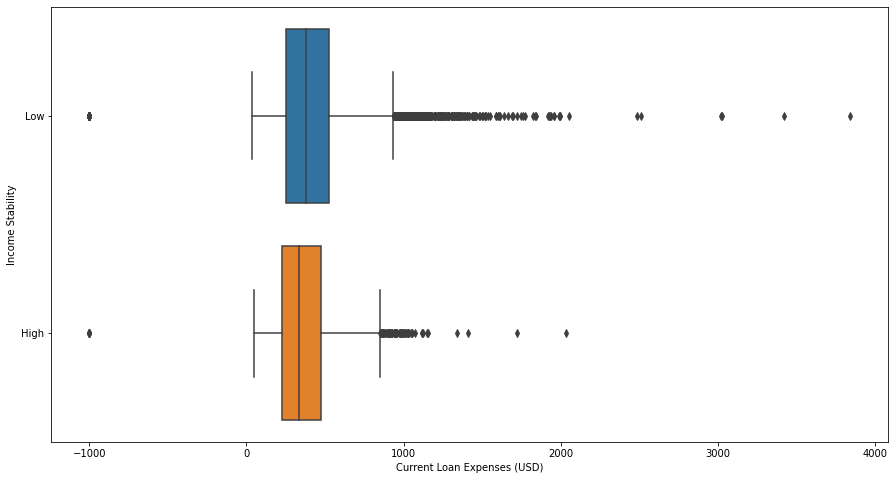

In [62]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(x="Current Loan Expenses (USD)",y = "Income Stability", data=train_req)

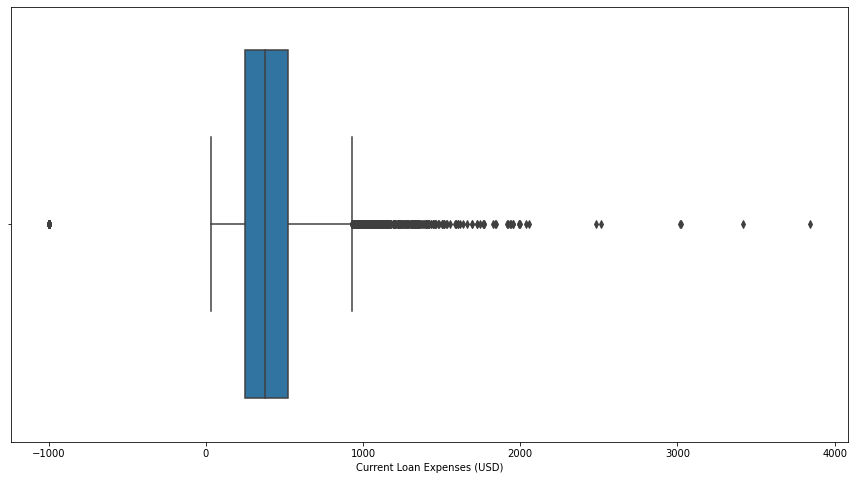

In [63]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(x="Current Loan Expenses (USD)", data=train_req)

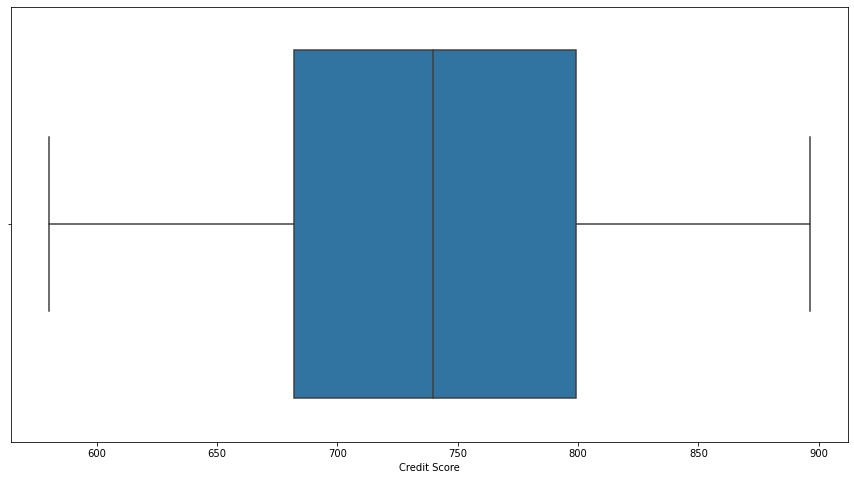

In [64]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(x="Credit Score", data=train_req)

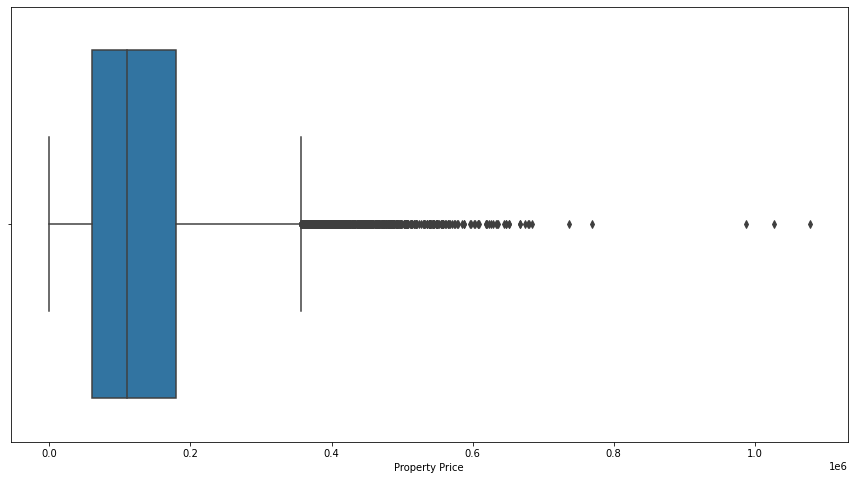

In [65]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(x="Property Price", data=train_req)

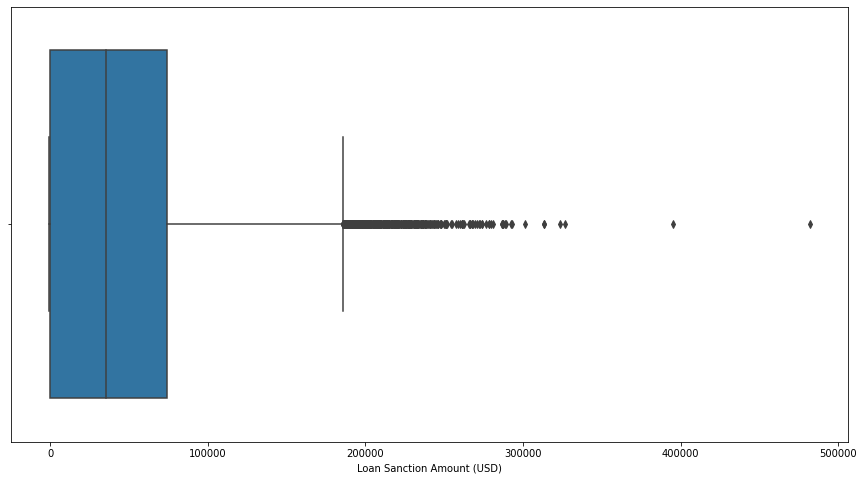

In [66]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(x="Loan Sanction Amount (USD)", data=train_req)

### Work on scaling and running solution

In [67]:
train_req["Income (USD)"].describe()

count    2.542400e+04
mean     2.630574e+03
std      1.126272e+04
min      3.777000e+02
25%      1.650457e+03
50%      2.222435e+03
75%      3.090593e+03
max      1.777460e+06
Name: Income (USD), dtype: float64

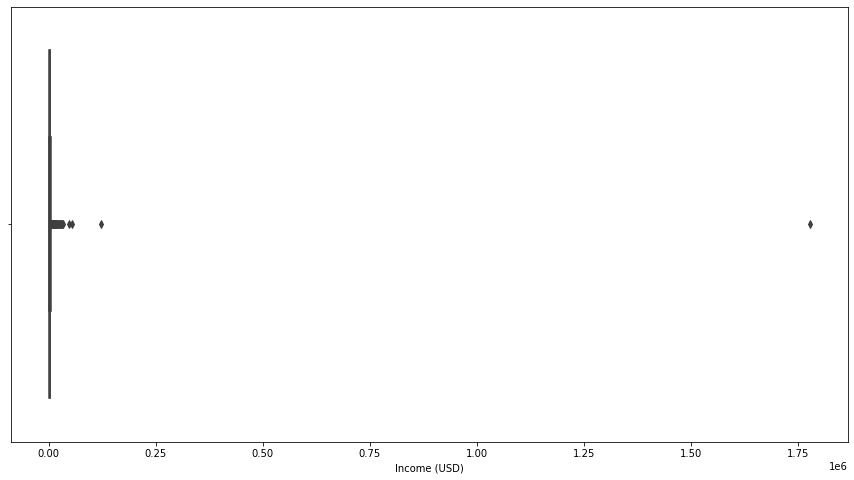

In [68]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(x="Income (USD)", data=train_req)

### Other Models

In [69]:
train = train[train['Profession'] != 'Businessman']

In [70]:
non_numeric_col = [x for x in train.columns if train[x].dtypes == "O"]
numeric_col = [x for x in train.columns if train[x].dtypes != "O"]

In [71]:
display(train['Profession'].unique())
display(test['Profession'].unique())

array(['Working', 'Pensioner', 'State servant', 'Commercial associate',
       'Unemployed', 'Student', 'Maternity leave'], dtype=object)

array(['Commercial associate', 'Working', 'Pensioner', 'State servant',
       'Unemployed', 'Maternity leave', 'Student'], dtype=object)

In [72]:
test['Co-Applicant'] = pd.to_numeric(test['Co-Applicant'], errors="coerce")
test['Property Price'] = pd.to_numeric(test['Property Price'], errors="coerce")

In [73]:
X_dummies = pd.get_dummies(train)
X_test_dummies = pd.get_dummies(test)

In [74]:
X_test_dummies.shape

(20000, 53)

In [75]:
X_test_dummies.head()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Co-Applicant,Property Price,Gender_F,Gender_M,Income Stability_High,Income Stability_Low,Profession_Commercial associate,Profession_Maternity leave,Profession_Pensioner,Profession_State servant,Profession_Student,Profession_Unemployed,Profession_Working,Type of Employment_Accountants,Type of Employment_Cleaning staff,Type of Employment_Cooking staff,Type of Employment_Core staff,Type of Employment_Drivers,Type of Employment_HR staff,Type of Employment_High skill tech staff,Type of Employment_IT staff,Type of Employment_Laborers,Type of Employment_Low-skill Laborers,Type of Employment_Managers,Type of Employment_Medicine staff,Type of Employment_Private service staff,Type of Employment_Realty agents,Type of Employment_Sales staff,Type of Employment_Secretaries,Type of Employment_Security staff,Type of Employment_Waiters/barmen staff,Location_Rural,Location_Semi-Urban,Location_Urban,Expense Type 1_N,Expense Type 1_Y,Expense Type 2_N,Expense Type 2_Y,Has Active Credit Card_Active,Has Active Credit Card_Inactive,Has Active Credit Card_Unpossessed,Property Location_Rural,Property Location_Semi-Urban,Property Location_Urban
0,47,3472.69,137088.98,396.72,2.0,799.14,0,3472.69,2,1.0,236644.50,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1
1,57,1184.84,104771.59,463.76,2.0,833.31,0,1184.84,1,1.0,142357.30,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0
2,52,1266.27,176684.91,493.15,3.0,627.44,0,1266.27,1,1.0,300991.24,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1
3,65,1369.72,97009.18,446.15,2.0,833.20,0,1369.72,1,0.0,125612.10,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
4,60,1939.23,109980.00,370.10,NaN,NaN,0,1939.23,4,1.0,180908.00,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0


In [76]:
X_dummies.head()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD),Gender_F,Gender_M,Income Stability_High,Income Stability_Low,Profession_Commercial associate,Profession_Maternity leave,Profession_Pensioner,Profession_State servant,Profession_Student,Profession_Unemployed,Profession_Working,Type of Employment_Accountants,Type of Employment_Cleaning staff,Type of Employment_Cooking staff,Type of Employment_Core staff,Type of Employment_Drivers,Type of Employment_HR staff,Type of Employment_High skill tech staff,Type of Employment_IT staff,Type of Employment_Laborers,Type of Employment_Low-skill Laborers,Type of Employment_Managers,Type of Employment_Medicine staff,Type of Employment_Private service staff,Type of Employment_Realty agents,Type of Employment_Sales staff,Type of Employment_Secretaries,Type of Employment_Security staff,Type of Employment_Waiters/barmen staff,Location_Rural,Location_Semi-Urban,Location_Urban,Expense Type 1_N,Expense Type 1_Y,Expense Type 2_N,Expense Type 2_Y,Has Active Credit Card_Active,Has Active Credit Card_Inactive,Has Active Credit Card_Unpossessed,Property Location_Rural,Property Location_Semi-Urban,Property Location_Urban
0,56,1933.05,72809.58,241.08,3.0,809.44,0,1933.05,4,1.0,119933.46,54607.18,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0
1,32,4952.91,46837.47,495.81,1.0,780.40,0,4952.91,2,1.0,54791.00,37469.98,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0
2,65,988.19,45593.04,171.95,1.0,833.15,0,988.19,2,0.0,72440.58,36474.43,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1
3,65,NaN,80057.92,298.54,2.0,832.70,1,NaN,2,1.0,121441.51,56040.54,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
4,31,2614.77,113858.89,491.41,NaN,745.55,1,2614.77,4,1.0,208567.91,74008.28,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0


In [77]:
X_dummies.shape

(29998, 54)

In [78]:
X_test_dummies.shape

(20000, 53)

In [79]:
from sklearn.impute import KNNImputer

In [80]:
knnImpute = KNNImputer()

X_df = pd.DataFrame(knnImpute.fit_transform(X_dummies), columns=X_dummies.columns)
# X_test_df = pd.DataFrame(knnImpute.fit_transform(X_test_dummies), columns=X_test_dummies.columns)

In [81]:
knnImpute = KNNImputer()

X_test_df = pd.DataFrame(knnImpute.fit_transform(X_test_dummies), columns=X_test_dummies.columns)

In [82]:
X_df.head()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD),Gender_F,Gender_M,Income Stability_High,Income Stability_Low,Profession_Commercial associate,Profession_Maternity leave,Profession_Pensioner,Profession_State servant,Profession_Student,Profession_Unemployed,Profession_Working,Type of Employment_Accountants,Type of Employment_Cleaning staff,Type of Employment_Cooking staff,Type of Employment_Core staff,Type of Employment_Drivers,Type of Employment_HR staff,Type of Employment_High skill tech staff,Type of Employment_IT staff,Type of Employment_Laborers,Type of Employment_Low-skill Laborers,Type of Employment_Managers,Type of Employment_Medicine staff,Type of Employment_Private service staff,Type of Employment_Realty agents,Type of Employment_Sales staff,Type of Employment_Secretaries,Type of Employment_Security staff,Type of Employment_Waiters/barmen staff,Location_Rural,Location_Semi-Urban,Location_Urban,Expense Type 1_N,Expense Type 1_Y,Expense Type 2_N,Expense Type 2_Y,Has Active Credit Card_Active,Has Active Credit Card_Inactive,Has Active Credit Card_Unpossessed,Property Location_Rural,Property Location_Semi-Urban,Property Location_Urban
0,56.0,1933.050,72809.58,241.08,3.0,809.44,0.0,1933.050,4.0,1.0,119933.46,54607.18,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,32.0,4952.910,46837.47,495.81,1.0,780.40,0.0,4952.910,2.0,1.0,54791.00,37469.98,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,65.0,988.190,45593.04,171.95,1.0,833.15,0.0,988.190,2.0,0.0,72440.58,36474.43,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,65.0,2711.994,80057.92,298.54,2.0,832.70,1.0,2749.742,2.0,1.0,121441.51,56040.54,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,31.0,2614.770,113858.89,491.41,3.4,745.55,1.0,2614.770,4.0,1.0,208567.91,74008.28,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [83]:
nc = X_df.loc[:, numeric_col]

In [84]:
X_df.head()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD),Gender_F,Gender_M,Income Stability_High,Income Stability_Low,Profession_Commercial associate,Profession_Maternity leave,Profession_Pensioner,Profession_State servant,Profession_Student,Profession_Unemployed,Profession_Working,Type of Employment_Accountants,Type of Employment_Cleaning staff,Type of Employment_Cooking staff,Type of Employment_Core staff,Type of Employment_Drivers,Type of Employment_HR staff,Type of Employment_High skill tech staff,Type of Employment_IT staff,Type of Employment_Laborers,Type of Employment_Low-skill Laborers,Type of Employment_Managers,Type of Employment_Medicine staff,Type of Employment_Private service staff,Type of Employment_Realty agents,Type of Employment_Sales staff,Type of Employment_Secretaries,Type of Employment_Security staff,Type of Employment_Waiters/barmen staff,Location_Rural,Location_Semi-Urban,Location_Urban,Expense Type 1_N,Expense Type 1_Y,Expense Type 2_N,Expense Type 2_Y,Has Active Credit Card_Active,Has Active Credit Card_Inactive,Has Active Credit Card_Unpossessed,Property Location_Rural,Property Location_Semi-Urban,Property Location_Urban
0,56.0,1933.050,72809.58,241.08,3.0,809.44,0.0,1933.050,4.0,1.0,119933.46,54607.18,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,32.0,4952.910,46837.47,495.81,1.0,780.40,0.0,4952.910,2.0,1.0,54791.00,37469.98,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,65.0,988.190,45593.04,171.95,1.0,833.15,0.0,988.190,2.0,0.0,72440.58,36474.43,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,65.0,2711.994,80057.92,298.54,2.0,832.70,1.0,2749.742,2.0,1.0,121441.51,56040.54,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,31.0,2614.770,113858.89,491.41,3.4,745.55,1.0,2614.770,4.0,1.0,208567.91,74008.28,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [85]:
X,y=X_df.drop("Loan Sanction Amount (USD)", axis = 1), X_df.loc[:, "Loan Sanction Amount (USD)"]

In [86]:
display(len(train.iloc[:, 0:-1].columns))
len(test.columns)

20

20

In [87]:
display(X.columns, X_test_dummies.columns)

Index(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Property Age', 'Property Type', 'Co-Applicant',
       'Property Price', 'Gender_F', 'Gender_M', 'Income Stability_High',
       'Income Stability_Low', 'Profession_Commercial associate',
       'Profession_Maternity leave', 'Profession_Pensioner',
       'Profession_State servant', 'Profession_Student',
       'Profession_Unemployed', 'Profession_Working',
       'Type of Employment_Accountants', 'Type of Employment_Cleaning staff',
       'Type of Employment_Cooking staff', 'Type of Employment_Core staff',
       'Type of Employment_Drivers', 'Type of Employment_HR staff',
       'Type of Employment_High skill tech staff',
       'Type of Employment_IT staff', 'Type of Employment_Laborers',
       'Type of Employment_Low-skill Laborers', 'Type of Employment_Managers',
       'Type of Employment_Medicine staff',
       'Type of Emplo

Index(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Property Age', 'Property Type', 'Co-Applicant',
       'Property Price', 'Gender_F', 'Gender_M', 'Income Stability_High',
       'Income Stability_Low', 'Profession_Commercial associate',
       'Profession_Maternity leave', 'Profession_Pensioner',
       'Profession_State servant', 'Profession_Student',
       'Profession_Unemployed', 'Profession_Working',
       'Type of Employment_Accountants', 'Type of Employment_Cleaning staff',
       'Type of Employment_Cooking staff', 'Type of Employment_Core staff',
       'Type of Employment_Drivers', 'Type of Employment_HR staff',
       'Type of Employment_High skill tech staff',
       'Type of Employment_IT staff', 'Type of Employment_Laborers',
       'Type of Employment_Low-skill Laborers', 'Type of Employment_Managers',
       'Type of Employment_Medicine staff',
       'Type of Emplo

In [88]:
for a, b in zip(X[0:-1].columns, X_test_dummies.columns):
  if a != b:
    print(a, b)

In [89]:
X_test_df.head()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Co-Applicant,Property Price,Gender_F,Gender_M,Income Stability_High,Income Stability_Low,Profession_Commercial associate,Profession_Maternity leave,Profession_Pensioner,Profession_State servant,Profession_Student,Profession_Unemployed,Profession_Working,Type of Employment_Accountants,Type of Employment_Cleaning staff,Type of Employment_Cooking staff,Type of Employment_Core staff,Type of Employment_Drivers,Type of Employment_HR staff,Type of Employment_High skill tech staff,Type of Employment_IT staff,Type of Employment_Laborers,Type of Employment_Low-skill Laborers,Type of Employment_Managers,Type of Employment_Medicine staff,Type of Employment_Private service staff,Type of Employment_Realty agents,Type of Employment_Sales staff,Type of Employment_Secretaries,Type of Employment_Security staff,Type of Employment_Waiters/barmen staff,Location_Rural,Location_Semi-Urban,Location_Urban,Expense Type 1_N,Expense Type 1_Y,Expense Type 2_N,Expense Type 2_Y,Has Active Credit Card_Active,Has Active Credit Card_Inactive,Has Active Credit Card_Unpossessed,Property Location_Rural,Property Location_Semi-Urban,Property Location_Urban
0,47.0,3472.69,137088.98,396.72,2.0,799.140,0.0,3472.69,2.0,1.0,236644.50,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,57.0,1184.84,104771.59,463.76,2.0,833.310,0.0,1184.84,1.0,1.0,142357.30,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,52.0,1266.27,176684.91,493.15,3.0,627.440,0.0,1266.27,1.0,1.0,300991.24,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,65.0,1369.72,97009.18,446.15,2.0,833.200,0.0,1369.72,1.0,0.0,125612.10,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,60.0,1939.23,109980.00,370.10,2.0,781.798,0.0,1939.23,4.0,1.0,180908.00,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [90]:
X.head()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Co-Applicant,Property Price,Gender_F,Gender_M,Income Stability_High,Income Stability_Low,Profession_Commercial associate,Profession_Maternity leave,Profession_Pensioner,Profession_State servant,Profession_Student,Profession_Unemployed,Profession_Working,Type of Employment_Accountants,Type of Employment_Cleaning staff,Type of Employment_Cooking staff,Type of Employment_Core staff,Type of Employment_Drivers,Type of Employment_HR staff,Type of Employment_High skill tech staff,Type of Employment_IT staff,Type of Employment_Laborers,Type of Employment_Low-skill Laborers,Type of Employment_Managers,Type of Employment_Medicine staff,Type of Employment_Private service staff,Type of Employment_Realty agents,Type of Employment_Sales staff,Type of Employment_Secretaries,Type of Employment_Security staff,Type of Employment_Waiters/barmen staff,Location_Rural,Location_Semi-Urban,Location_Urban,Expense Type 1_N,Expense Type 1_Y,Expense Type 2_N,Expense Type 2_Y,Has Active Credit Card_Active,Has Active Credit Card_Inactive,Has Active Credit Card_Unpossessed,Property Location_Rural,Property Location_Semi-Urban,Property Location_Urban
0,56.0,1933.050,72809.58,241.08,3.0,809.44,0.0,1933.050,4.0,1.0,119933.46,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,32.0,4952.910,46837.47,495.81,1.0,780.40,0.0,4952.910,2.0,1.0,54791.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,65.0,988.190,45593.04,171.95,1.0,833.15,0.0,988.190,2.0,0.0,72440.58,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,65.0,2711.994,80057.92,298.54,2.0,832.70,1.0,2749.742,2.0,1.0,121441.51,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,31.0,2614.770,113858.89,491.41,3.4,745.55,1.0,2614.770,4.0,1.0,208567.91,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [91]:
y.shape

(29998,)

In [92]:
skl_regression = LinearRegression()
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(skl_regression, X, y, scoring='r2', cv=folds)
scores  

array([0.65716226, 0.61703317, 0.66191245, 0.6593155 , 0.6417434 ])

lm: 0.647293 (0.020020)
dtr: 0.528241 (0.033228)
etr: 0.762228 (0.015744)
gbm: 0.764794 (0.015328)
rfr: 0.763234 (0.017635)
[11:06:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:06:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:06:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:07:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:07:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:07:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:07:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:s

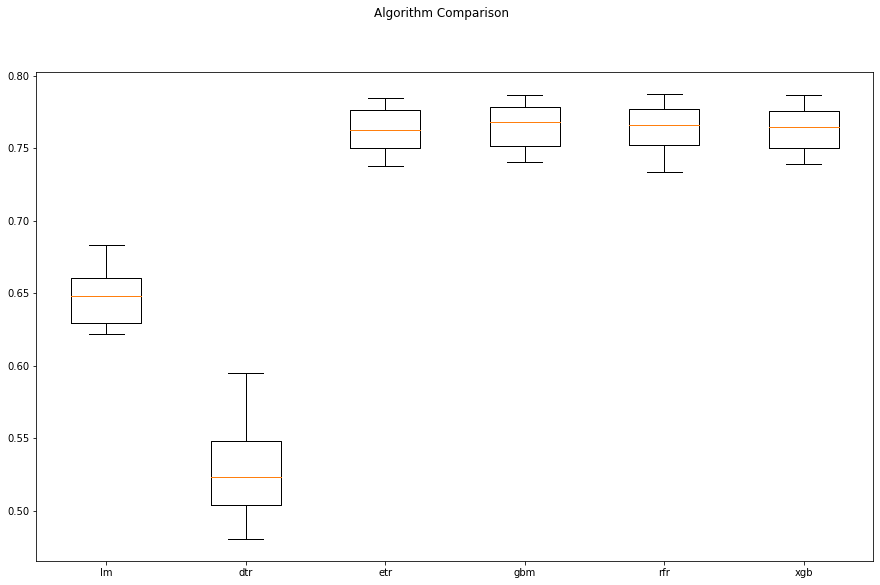

In [109]:
def create_baseline_regressors(seed=8):
    models = []
    models.append(('lm', LinearRegression()))
    models.append(('dtr', DecisionTreeRegressor(random_state=seed)))
    models.append(('etr', ExtraTreesRegressor(random_state=seed)))
    models.append(('gbm', GradientBoostingRegressor(random_state=seed)))
    models.append(('rfr', RandomForestRegressor(random_state=seed)))
    # models.append(('svc', SVR()))
    models.append(('xgb', XGBRegressor(seed=seed)))
    return models

results = []
seed = 243
names = []
scoring = 'r2'
for name, model in create_baseline_regressors():
	kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state = seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
# print(results)
fig = plt.figure(figsize=(15, 9))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [94]:
lmm = skl_regression.fit(X, y)
predicted = lmm.predict(X_test_df)

In [97]:
predicted.shape

(20000,)

In [107]:
final_predict = pd.DataFrame({'Customer ID': test["Customer ID"], 'Loan Sanction Amount (USD)': predicted})

In [108]:
final_predict.to_csv("Predicted.csv", index=False)

In [110]:
gbm = GradientBoostingRegressor(random_state=243)
gbm.fit(X,y)
predicted_gbm = lmm.predict(X_test_df)

In [111]:
predicted_gbm.shape

(20000,)

In [112]:
final_predict_gbm = pd.DataFrame({'Customer ID': test["Customer ID"], 'Loan Sanction Amount (USD)': predicted_gbm})

In [113]:
final_predict_gbm.to_csv("PredictedGBM.csv", index=False)